# Exercício 9 MLP



In [154]:
#Bibliotecas

import numpy as np
import matplotlib.pyplot as plt

In [155]:
PI = 3.141592653589793

x = np.linspace(0, 2*PI, 45).reshape(-1,1)  # shape (n_amostras, 1)
y = (np.sin(x) + np.random.uniform(-0.1,0.1,len(x)).reshape(-1,1))

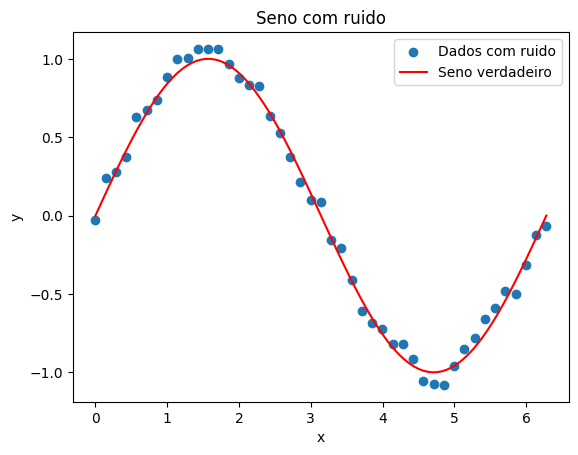

In [156]:
#Plot dados

plt.scatter(x,y)
plt.title("Seno com ruido")
plt.xlabel("x")
plt.ylabel("y")

#Mais a curva verdadeira
plt.plot(np.linspace(0, 2*PI,100), np.sin(np.linspace(0, 2*PI,100)), color='red')
plt.legend(["Dados com ruido","Seno verdadeiro"])

plt.show()

In [157]:
def tanh(z):
    return np.tanh(z)

def tanh_deriv(z):
    return 1.0 - np.tanh(z)**2

# Classe da Rede Neural
class NeuralNetwork:
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.uniform(-.5,.5,(y, 1)) for y in sizes[1:]]
       
        # --- MELHORIA 1: Inicialização de Pesos Xavier/Glorot ---
        self.weights = [np.random.uniform(-.5,.5,(y, x))  for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, x):
        activation = x
        for w, b in zip(self.weights[:-1], self.biases[:-1]):
            activation = tanh(np.dot(w, activation) + b)
        return np.dot(self.weights[-1], activation) + self.biases[-1]

    def back_prop(self, x, y):
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        activation = x
        activations = [x]
        zs = []

        # Propagação para frente
        for w, b in zip(self.weights[:-1], self.biases[:-1]):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = tanh(z)
            activations.append(activation)

        z = np.dot(self.weights[-1], activation) + self.biases[-1]
        zs.append(z)
        activations.append(z)

        # Erro na saída
        delta = (activations[-1]- y)
        grad_b[-1] = delta
        grad_w[-1] = np.dot(delta, activations[-2].T)

        # Backprop nas camadas ocultas
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = tanh_deriv(z)
            delta = np.dot(self.weights[-l+1].T, delta) * sp
            grad_b[-l] = delta
            grad_w[-l] = np.dot(delta, activations[-l-1].T)

        return grad_b, grad_w

    def train(self, x_data, y_data, epochs, eta, print_cost=True):
        num_samples = x_data.shape[0]
        for epoch in range(epochs):
            error_epoch = 0
            index = np.random.permutation(num_samples)

            for i in index:
                x_sample = x_data[i].reshape(-1,1)  # força coluna
                y_sample = y_data[i].reshape(-1,1)

                grad_b, grad_w = self.back_prop(x_sample, y_sample)

                self.weights = [w - eta * gw for w, gw in zip(self.weights, grad_w)]
                self.biases = [b - eta * gb for b, gb in zip(self.biases, grad_b)]

                error_epoch += np.sum((self.feedforward(x_sample) - y_sample)**2)

            if print_cost:
                print(f"Epoch {epoch+1}, MSE: {error_epoch / num_samples}")

In [158]:
# Fazer treinamento de 5 redes 
n_networks = 5

#Inicializa 5 redes diferentes dentro de um array
MSE = []
networks = []
for _ in range(n_networks):
    nn = NeuralNetwork([1,3,1])
    nn.train(x,y,epochs=200,eta=0.05,print_cost=False)
    networks.append(nn)
    MSE.append( np.mean( (y-nn.feedforward(x.T))**2 ) )



In [159]:
#Print da média e do desvio padrão

print(f"Média dos erros: {np.mean(MSE)}, Desvio padrão: {np.std(MSE)}")

print(MSE)

Média dos erros: 1.024689381425038, Desvio padrão: 0.036388987121374415
[np.float64(0.9736151506317918), np.float64(1.0340788741983586), np.float64(1.0069701428539193), np.float64(1.0847695251943612), np.float64(1.024013214246759)]


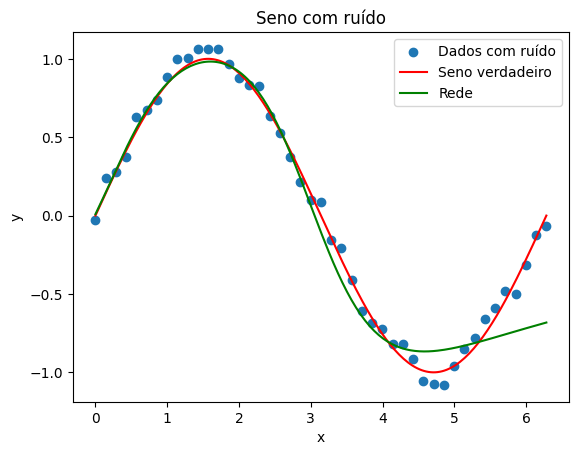

In [160]:
x_curva = np.linspace(0, 2*PI, 200).reshape(-1,1)
y_real = np.sin(x_curva)
y_rede = nn.feedforward(x_curva.T).reshape(-1)


plt.scatter(x, y)
plt.title("Seno com ruído")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_curva, y_real, color='red')
plt.plot(x_curva, y_rede, color='green')
plt.legend(["Dados com ruído", "Seno verdadeiro", "Rede"])
plt.show()